In [ ]:
'''
trips = df[(df["start"] != 0) & (df["end"] != 0) & (df["start"] != df["end"])]

stations = set()

for idx, row in trips.iterrows():
    origin = clubs[row["start"]]
    destination = clubs[row["end"]]
    
    if (-74.06 <= origin[1] <= -73.77) & \
    (-74.06 <= destination[1] <= -73.77) & \
    (40.61 <= origin[0] <= 40.91) & \
    (40.61 <= destination[0] <= 40.91):
        stations.add((origin[1], origin[0]))
        stations.add((destination[1], destination[0]))

diction = {}
c = 0
for i in stations:
    c += 1
    diction[i] = c

position = {}
c = 0
for i in stations:
    c += 1
    position[c] = i

G = nx.DiGraph()

for k, v in diction.items():
    G.add_node(v, lat=k[1], long=k[0])

for idx, row in trips.iterrows():
    origin = clubs[row["start"]]
    destination = clubs[row["end"]]
    
    if (-74.06 <= origin[1] <= -73.77) & \
    (-74.06 <= destination[1] <= -73.77) & \
    (40.61 <= origin[0] <= 40.91) & \
    (40.61 <= destination[0] <= 40.91):
        G.add_edge(diction[(origin[1], origin[0])], diction[(destination[1], destination[0])])

nx.draw_networkx(G, pos=position, node_color="green", edge_color="black", \
                 width=0.1, node_size=10, with_labels=False)
'''

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
df = pd.read_csv("rich.csv")

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (1,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df["my_dates"] = pd.to_datetime(df["tpep_pickup_datetime"])
df["day_of_week"] = df["my_dates"].dt.weekday_name
df["time"] = df["my_dates"].dt.time

In [4]:
df["start"] = 0
df["end"] = 0

In [5]:
clubs = [(40.74405065, -74.00631335),
         (40.7397342, -74.0070218),
         (40.7423311, -74.0034791), 
         (40.766805, -73.996215),
         (40.7640706, -73.9975569), 
         (40.7409232, -74.008111),
         (40.7500697, -74.0027905),
         (40.722524, -73.9797307),
         (40.7223166, -73.9578179), 
         (40.7382579, -74.0094507), 
         (40.7645758, -73.99595)]

In [6]:
mapping = {
    1: "1 Oak / Avenue",
    2: "Cielo",
    3: "Electric Room / PH-D at Dream Downtown",
    4: "FREQ",
    5: "Hudson Terrace",
    6: "Le Bain",
    7: "Marquee New York",
    8: "Nublu",
    9: "Output",
    10: "The Jane Hotel",
    11: "The Press Lounge",
}

In [7]:
def pickup_neighbor(df, coor):
    lat, long = coor
    return df[(df["pickup_latitude"] > lat - 0.001) & (df["pickup_latitude"] < lat + 0.001) & \
   (df["pickup_longitude"] > long - 0.001) & (df["pickup_longitude"] < long + 0.001)].index

In [8]:
def dropoff_neighbor(df, coor):
    lat, long = coor
    return df[(df["dropoff_latitude"] > lat - 0.001) & (df["dropoff_latitude"] < lat + 0.001) & \
   (df["dropoff_longitude"] > long - 0.001) & (df["dropoff_longitude"] < long + 0.001)].index

In [9]:
c = 0
for club in clubs:
    df.loc[pickup_neighbor(df, club), "start"] = c
    df.loc[dropoff_neighbor(df, club), "end"] = c
    c += 1

In [10]:
nc = df[((df["day_of_week"] == "Friday") |
        (df["day_of_week"] == "Saturday") | (df["day_of_week"] == "Sunday")) & 
        (((df["time"] >= dt.time(0, 0, 0)) & (df["time"] < dt.time(4, 30, 0))))]

In [11]:
nc = nc[(nc["start"] != 0)]

In [12]:
nc = nc[nc["trip_distance"] > 5]

In [13]:
nc = nc[nc["passenger_count"] == 1]

In [14]:
nc = nc[(nc["RatecodeID"] != 2) & (nc["RatecodeID"] != 3)]

In [15]:
stations = set()

for idx, row in nc.iterrows():
    origin = (row["pickup_longitude"], row["pickup_latitude"])
    destination = (row["dropoff_longitude"], row["dropoff_latitude"])
    
    if (row["start"] != 0) & \
    (-74.06 <= origin[0] <= -73.77) & \
    (-74.06 <= destination[0] <= -73.77) & \
    (40.61 <= origin[1] <= 40.91) & \
    (40.61 <= destination[1] <= 40.91):
        stations.add(origin)
        stations.add(destination)

In [16]:
diction = {}
c = 0
for i in stations:
    c += 1
    diction[i] = c

position = {}
c = 0
for i in stations:
    c += 1
    position[c] = i

G = nx.Graph()

for k, v in diction.items():
    G.add_node(v, lat=k[1], long=k[0])

In [17]:
for idx, row in nc.iterrows():
    origin = (row["pickup_longitude"], row["pickup_latitude"])
    destination = (row["dropoff_longitude"], row["dropoff_latitude"])
    
    if (row["start"] != 0) & \
    (-74.06 <= origin[0] <= -73.77) & \
    (-74.06 <= destination[0] <= -73.77) & \
    (40.61 <= origin[1] <= 40.91) & \
    (40.61 <= destination[1] <= 40.91):
        G.add_edge(diction[origin], diction[destination])

In [18]:
nx.draw_networkx(G, pos=position, node_color="green", edge_color="black", \
                 width=0.1, node_size=2, with_labels=False)

In [19]:
trips2 = df[(df["start"] != 0) & (df["end"] != 0) & (df["start"] != df["end"])]

stations2 = set()

for idx, row in trips2.iterrows():
    origin = clubs[row["start"]]
    destination = clubs[row["end"]]
    
    if (-74.06 <= origin[1] <= -73.77) & \
    (-74.06 <= destination[1] <= -73.77) & \
    (40.61 <= origin[0] <= 40.91) & \
    (40.61 <= destination[0] <= 40.91):
        stations2.add((origin[1], origin[0]))
        stations2.add((destination[1], destination[0]))

diction2 = {}
c = 0
for i in stations2:
    c += 1
    diction2[i] = c

position2 = {}
c = 0
for i in stations2:
    c += 1
    position2[c] = i

G2 = nx.Graph()

for k, v in diction2.items():
    G2.add_node(v, lat=k[1], long=k[0])
    G2.add_edge(diction2[(origin[1], origin[0])], diction2[(origin[1], origin[0])])

for idx, row in trips2.iterrows():
    origin = clubs[row["start"]]
    destination = clubs[row["end"]]
    
    if (-74.06 <= origin[1] <= -73.77) & \
    (-74.06 <= destination[1] <= -73.77) & \
    (40.61 <= origin[0] <= 40.91) & \
    (40.61 <= destination[0] <= 40.91):
        G2.add_edge(diction2[(origin[1], origin[0])], diction2[(destination[1], destination[0])])

nx.draw_networkx(G2, pos=position2, node_color="red", edge_color="black", \
                 width=0.1, node_size=5, with_labels=False)

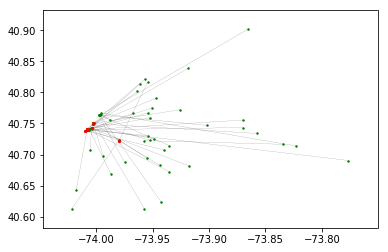

In [20]:
plt.show()

In [21]:
testing = pd.read_csv("NYC_nightclubs.csv")

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (1,9,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [22]:
testing["tip_rate"] = testing["tip_amount"] / testing["fare_amount"]
testing["my_dates"] = pd.to_datetime(testing["tpep_pickup_datetime"])
testing["day_of_week"] = testing["my_dates"].dt.weekday_name
testing["time"] = testing["my_dates"].dt.time

In [23]:
def filtering(df, lat, long):
    lat = round(lat, 3)
    long = round(long, 3)
    test = df.round(3)
    return test[(test["dropoff_latitude"] == lat) & (test["dropoff_longitude"] == long)]

In [24]:
filtering(testing, 40.735, -74.025)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,tip_rate,my_dates,day_of_week,time
